In [3]:
import numpy as np
import pandas as pd 

df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")  # for final submission

x_train = df_train.copy()
x_train.drop('id', axis=1, inplace=True)
x_train.drop('Product ID', axis=1, inplace=True)
x_train.drop('Machine failure', axis=1, inplace=True)
y_train = df_train["Machine failure"]

x_test = df_test.copy()
x_test.drop('id', axis=1, inplace=True)
x_test.drop('Product ID', axis=1, inplace=True)

x_train = np.array(x_train)
y_train = np.array(y_train, dtype=np.float32)
x_test = np.array(x_test)

lm_column = 0
x_train[:, lm_column] = np.where(x_train[:, lm_column] == 'L', 0, 1)
x_test[:, lm_column] = np.where(x_test[:, lm_column] == 'L', 0, 1)

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

print(x_train[:5, :])

[[0.000e+00 3.006e+02 3.096e+02 1.596e+03 3.610e+01 1.400e+02 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 3.026e+02 3.121e+02 1.759e+03 2.910e+01 2.000e+02 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 2.993e+02 3.085e+02 1.805e+03 2.650e+01 2.500e+01 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 3.010e+02 3.109e+02 1.524e+03 4.430e+01 1.970e+02 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 2.980e+02 3.090e+02 1.641e+03 3.540e+01 3.400e+01 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00]]


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

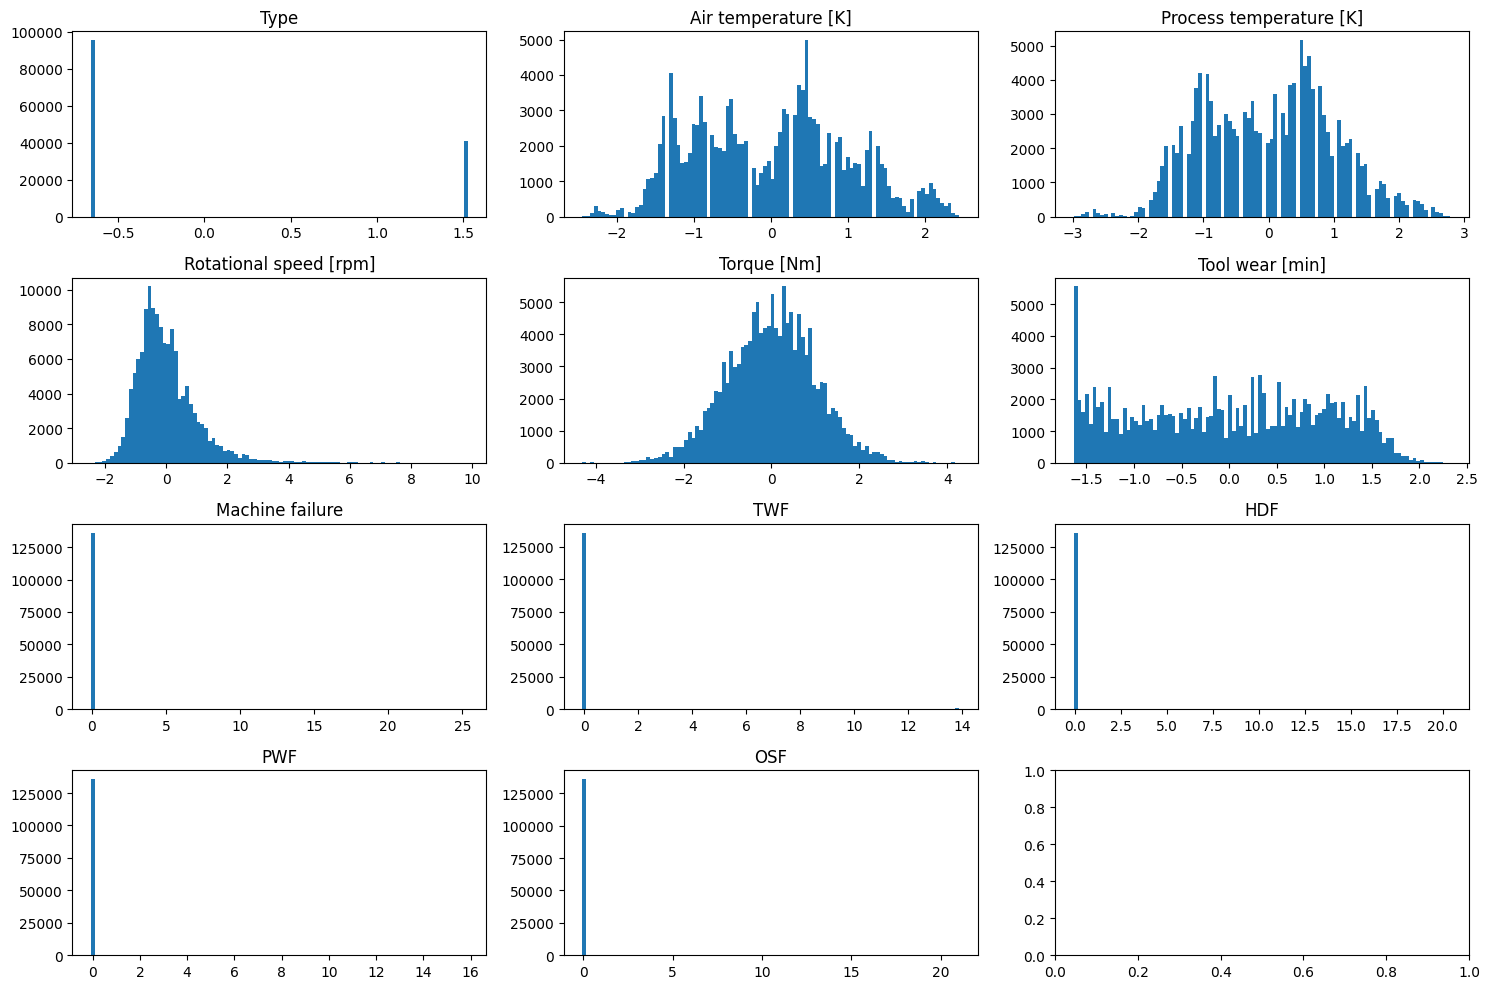

In [11]:
import matplotlib.pyplot as plt

num_cols = 3
num_rows = (x_train.shape[1] + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, ax in enumerate(axes.flatten()):
    if i < x_train.shape[1]:
        ax.hist(x_train[:, i], bins=100)
        ax.set_title(df_train.columns[i+2])

# Hide any unused subplots
for j in range(i+1, num_cols*num_rows):
    axes.flatten()[j].axis('off')

# Adjust spacing between subplots
fig.tight_layout()

plt.show()


In [17]:
x_train[:5, :]

array([[-0.6563256 ,  0.39588368, -0.24622615,  0.54541594, -0.49971136,
         0.5564169 , -0.03945048, -0.07202055, -0.04901642, -0.06303833,
        -0.04756777],
       [ 1.5236341 ,  1.4698589 ,  1.558609  ,  1.7203082 , -1.3230276 ,
         1.4944327 , -0.03945048, -0.07202055, -0.04901642, -0.06303833,
        -0.04756777],
       [-0.6563256 , -0.30221003, -1.0403581 ,  2.0518727 , -1.628831  ,
        -1.2414469 , -0.03945048, -0.07202055, -0.04901642, -0.06303833,
        -0.04756777],
       [-0.6563256 ,  0.6106754 ,  0.6922794 ,  0.0264451 ,  0.46474525,
         1.4475318 , -0.03945048, -0.07202055, -0.04901642, -0.06303833,
        -0.04756777],
       [ 1.5236341 , -1.0002874 , -0.679391  ,  0.8697727 , -0.58204263,
        -1.1007445 , -0.03945048, -0.07202055, -0.04901642, -0.06303833,
        -0.04756777]], dtype=float32)

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [30]:
import tensorflow as tf
from tensorflow import keras

num_features = x_train.shape[1] 

model = keras.Sequential([
    keras.layers.Dense(128, activation='LeakyReLU', input_shape=(num_features,)),
    keras.layers.Dense(128, activation='LeakyReLU'),
    keras.layers.Dense(64, activation='LeakyReLU'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
3411/3411 [==============================] - 6s 2ms/step - loss: 0.0279 - accuracy: 0.9958
Epoch 2/10
3411/3411 [==============================] - 5s 1ms/step - loss: 0.0234 - accuracy: 0.9962
Epoch 3/10
3411/3411 [==============================] - 5s 2ms/step - loss: 0.0228 - accuracy: 0.9962
Epoch 4/10
3411/3411 [==============================] - 5s 2ms/step - loss: 0.0224 - accuracy: 0.9962
Epoch 5/10
3411/3411 [==============================] - 5s 2ms/step - loss: 0.0220 - accuracy: 0.9962
Epoch 6/10
3411/3411 [==============================] - 5s 2ms/step - loss: 0.0219 - accuracy: 0.9962
Epoch 7/10
3411/3411 [==============================] - 5s 2ms/step - loss: 0.0219 - accuracy: 0.9962
Epoch 8/10
3411/3411 [==============================] - 5s 1ms/step - loss: 0.0216 - accuracy: 0.9962
Epoch 9/10
3411/3411 [==============================] - 5s 2ms/step - loss: 0.0216 - accuracy: 0.9962
Epoch 10/10
3411/3411 [==============================] - 5s 2ms/step - loss: 0.021

In [31]:
predictions_cv = model.predict(x_cv)

853/853 [==============================] - 1s 1ms/step


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_cv_true = y_cv
y_cv_pred = np.where(predictions_cv < 0.5, 0, 1)

# Accuracy
accuracy = accuracy_score(y_cv_true, y_cv_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_cv_true, y_cv_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_cv_true, y_cv_pred)
print("Recall:", recall)

# F1-score
f1 = f1_score(y_cv_true, y_cv_pred)
print("F1-score:", f1)

# ROC AUC
roc_auc = roc_auc_score(y_cv_true, y_cv_pred)
print("ROC AUC:", roc_auc)


Accuracy: 0.9961518727552591
Precision: 0.9911504424778761
Recall: 0.7671232876712328
F1-score: 0.8648648648648648
ROC AUC: 0.8835057737521838


In [36]:
best_accuracy = 0.0
best_f1 = 0.0
best_epsilon = 0.0

for epsilon in np.linspace(0, 1, 100):
    y_cv_pred = np.where(predictions_cv < epsilon, 0, 1)

    accuracy = accuracy_score(y_cv, y_cv_pred)
    f1 = f1_score(y_cv, y_cv_pred)

    if accuracy > best_accuracy and f1 > best_f1:
        best_accuracy = accuracy
        best_f1 = f1
        best_epsilon = epsilon

print("Best Epsilon:", best_epsilon)
print("Best Accuracy:", best_accuracy)
print("Best F1-score:", best_f1)


Best Epsilon: 0.393939393939394
Best Accuracy: 0.9961518727552591
Best F1-score: 0.8648648648648648


In [39]:
predictions = model.predict(x_test)
predictions = np.where(predictions < best_epsilon, 0, 1)

indices = np.array(df_test["id"], dtype=int).reshape(-1, 1)

submission = np.hstack((indices, predictions))

submission_df = pd.DataFrame(submission, columns=['id', 'Machine failure'])
submission_df['id'] = submission_df['id'].astype(int)  # Convert "id" column to integer
submission_df.to_csv("submissions/supervised_learning_2.csv", index=False)

2843/2843 [==============================] - 3s 1ms/step
